[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 255 127 127]
 [127 127 127 ... 127 127 191]
 [127 127 127 ... 127 191 255]]


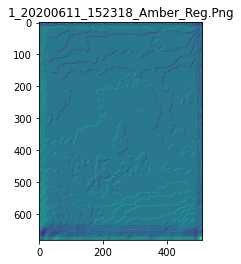

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [ 63 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 191 ... 127 127 127]]


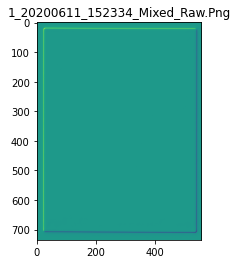

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]


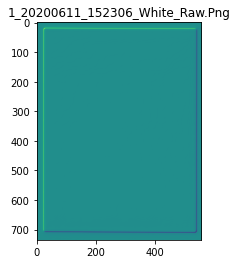

[[127 191 127 ... 127  63 127]
 [255 191 127 ... 127 127 191]
 [191 127 127 ... 127 127 127]
 ...
 [127 127 127 ...   0   0  63]
 [127 127 127 ...  63 127 127]
 [127 127 127 ... 127 127 127]]


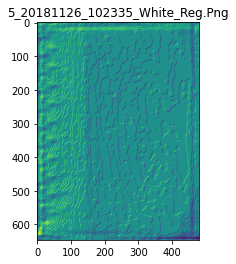

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]


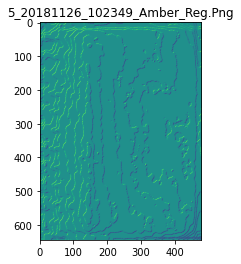

[[  0  63 127 ... 127 127 127]
 [ 63 127 191 ... 127 127 127]
 [191 255 127 ... 127 127 127]
 ...
 [127 127 127 ... 191 255 255]
 [127 127 127 ... 255 255 127]
 [127 127 127 ... 255 191 127]]


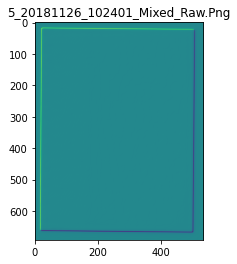

[[127 127 127 ... 127 127 127]
 [127 127 127 ...  63  63  63]
 [127 127 127 ...   0  63  63]
 ...
 [127 127 127 ... 127 191 191]
 [127 127 127 ... 191 255 191]
 [127 127 127 ... 191 191 127]]


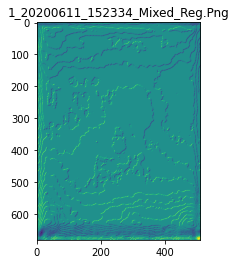

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [191 191 191 ... 127 127 127]
 ...
 [127 127  63 ... 127 127 127]
 [ 63  63 127 ... 127 127 127]
 [127 191 127 ... 127 127 127]]


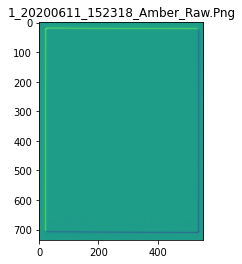

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 255 191 191]
 [127 127 127 ... 255 191 255]
 [127 127 127 ... 191 191 191]]


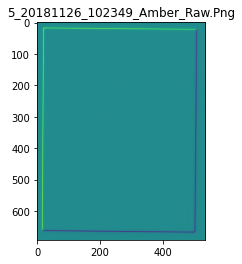

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 127  63  63]
 [127 127 127 ...   0   0  63]
 [127 127 127 ...  63 127 127]]


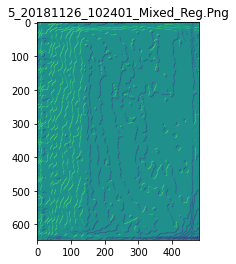

[[127 191 191 ... 127 127 127]
 [127 191 127 ...  63  63  63]
 [127 127  63 ...  63  63  63]
 ...
 [191 191 191 ... 191 191 191]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]]


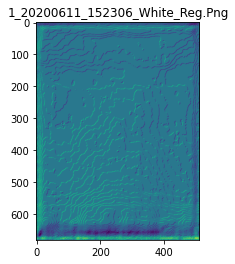

[[127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 [127 127 127 ... 127 127 127]
 ...
 [127 127 127 ... 191 255 255]
 [127 127 127 ... 255 255 127]
 [127 127 127 ... 255 191 127]]


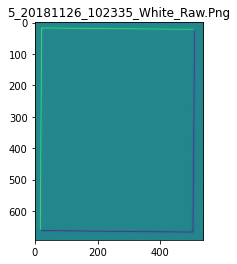

/Users/estepark/Documents/week9_tues/label/1_20181126_102202_White_Reg.png
1_20181126_102202_White_Reg.png
(646, 481, 3)


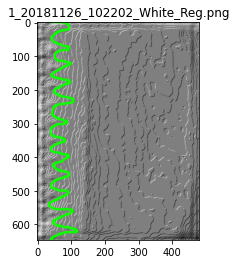

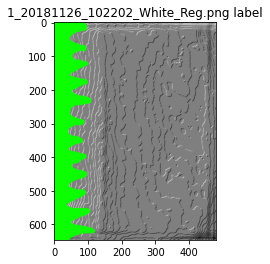

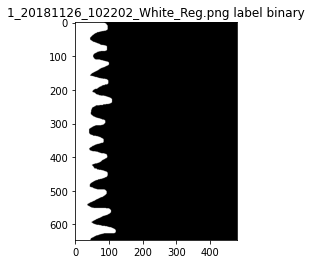

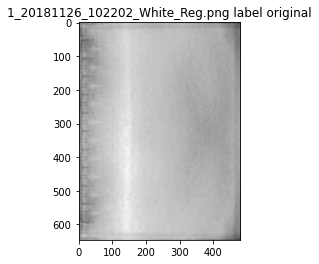

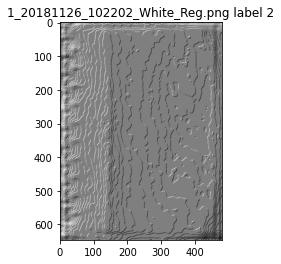

In [1]:
import cv2 as cv
import glob, os
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# https://github.com/Neo3333/ECE-271A
#https://github.com/Neo3333/ECE-271A/blob/master/hw1/hw1intro.pdf
#https://github.com/Neo3333/ECE-271A/blob/master/Lecture%20Notes/BDT.pdf


path = '/Users/estepark/Documents/week6_fri/Images'
results = '/Users/estepark/Documents/week6_fri/results'
kern = [[0, 1,  0], [1, 0, -1],[ 0, -1 ,0]]

for fname in glob.glob(path+'/*.Png'):
    serNum = fname.split('/')[6] 
    img  = cv.imread(fname)
    imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    imgFilt = cv.bilateralFilter(imgray, 15, 75, 75)
    diag_img = signal.convolve2d(imgFilt, np.array(kern), boundary='symm', mode='same')
    diag_cpy = (((diag_img+2))/4*255).astype(np.uint8) #bc min=-2 and max=+2

    print(diag_cpy)
    plt.figure()
    plt.title(serNum)
    plt.imshow(diag_img)
    plt.show()
    cv.imwrite(os.path.join(results, serNum), diag_cpy)
    

labels =  '/Users/estepark/Documents/week9_tues/label'

for fname in glob.glob(labels+'/*.png'):

    print(fname)
    serNum = fname.split('/')[6] 
    print(serNum)
    img  = cv.imread(fname)
    label = cv.imread('./images/{}'.format(serNum))
    label_2 = cv.imread('./results/{}'.format(serNum))
    label_2 = cv.cvtColor(label_2, cv.COLOR_BGR2GRAY)
    label_2 = label_2/255
    label = cv.cvtColor(label, cv.COLOR_BGR2GRAY)
    #label = label/255
    label = (label-np.min(label))/(np.max(label) - np.min(label))

    #label = cv.bilateralFilter(label, 15, 75, 75)
    labl = np.copy(img)
    
    labl_binary = np.zeros(img.shape[:2])
    print(labl.shape)
    for i in range(labl.shape[0]): 
        for j in range(labl.shape[1])[::-1]:
            if labl[i][j][0] == labl[i][j][1] == labl[i][j][2]:
                continue
            else:
                labl[i][0:j][:] = labl[i][j][:]
                labl_binary[i][0:j] = 1
                break
    plt.figure()
    plt.title(serNum)
    plt.imshow(img)
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label')
    plt.imshow(labl)
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label binary')
    plt.imshow(labl_binary, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label original')
    plt.imshow(label, cmap="gray")
    plt.show()
    
    plt.figure()
    plt.title(serNum+' label 2')
    plt.imshow(label_2, cmap="gray")
    plt.show()

In [2]:
print(label)
print('max = {}, min = {}'.format(np.max(label_2), np.min(label_2)))
#label = label[:,:,0]
print(label.shape)
#label = label/255
print('max = {}, min = {}'.format(np.max(label), np.min(label)))

[[0.42105263 0.39473684 0.44736842 ... 0.05263158 0.07894737 0.        ]
 [0.65789474 0.65789474 0.65789474 ... 0.23684211 0.21052632 0.18421053]
 [0.57894737 0.60526316 0.57894737 ... 0.21052632 0.23684211 0.21052632]
 ...
 [0.65789474 0.65789474 0.65789474 ... 0.26315789 0.18421053 0.05263158]
 [0.73684211 0.73684211 0.71052632 ... 0.21052632 0.15789474 0.05263158]
 [0.63157895 0.63157895 0.55263158 ... 0.13157895 0.10526316 0.        ]]
max = 1.0, min = 0.0
(646, 481)
max = 1.0, min = 0.0


In [3]:
import scipy.fftpack
def dct2d(a):
    """
    input: 1D dct
    output: 2D dct
    
    
    """
    return scipy.fftpack.dct(scipy.fftpack.dct( a, axis=0, norm='ortho' ),axis=1,norm='ortho')
n = 0

print("img rows {}".format(label.shape[0]))
print("img cols {}".format(label.shape[1]))

# if (img.shape[0]%8 !=0):
#     floorX = math.floor(img.shape[0]/8)
#     if (img.shape[1]% 8!=0 ):
#         floorY = math.floor(img.shape[1]/8)
# imgCrop = img[0:floorX*8, 0:floorY*8 ]
ch_dct = []
not_dct = []
bad_ch = 0
bad_not = 0 


"""
input: for every column correponding to every row, 
output:
fn: what:
    how:
    why:
"""
for i in range(label.shape[0]-7): 
    for j in range(label.shape[1]-7): 
        patch = label[i:i+8, j:j+8]
        patch_2 = label_2[i:i+8,j:j+8]
        vec = dct2d(patch).flatten()
        #print(i,',',j,':',vec)


        if np.all(patch_2 == patch_2[0][0]): 
            #print(i,',',j,':',vec)
            if labl_binary[i,j] == 1: 
                bad_ch += 1
            else: 
                bad_not += 1 
            continue
        if labl_binary[i,j] == 1: 
            ch_dct.append(vec)
        else: 
            not_dct.append(vec)
        assert patch.shape == (8,8)
        n = n + 1
print(n)
print(label.shape[0]*label.shape[1])
print('bad ch = {}, bad not = {}'.format(bad_ch, bad_not))






img rows 646
img cols 481
199042
310726
bad ch = 2857, bad not = 100987


In [4]:
ch_dct = np.array(ch_dct)
not_dct = np.array(not_dct)
print(ch_dct.shape)

(44139, 64)


In [5]:
np.mean(ch_dct, axis=0)

array([ 5.26029903e+00, -5.57400993e-02,  3.70806905e-03, -6.37599222e-03,
        1.82065389e-04, -2.12611746e-03, -4.72481163e-05, -5.32633627e-04,
       -1.45164677e-03,  4.15520007e-05, -2.66353497e-05, -4.42868213e-05,
        3.19403213e-05, -6.11696264e-06,  6.64421308e-07,  1.50734648e-06,
       -3.26508938e-04,  1.08402910e-04,  1.93702713e-05,  2.78320931e-05,
        6.29576982e-06, -2.86386253e-06, -4.55160784e-06, -1.25043555e-07,
       -6.51009667e-04, -2.59789791e-05, -1.78515878e-06,  5.17783571e-06,
       -1.81102440e-05,  1.79603781e-06,  3.84500573e-06,  2.55991071e-06,
       -6.47848722e-04,  3.61447363e-05, -1.92457594e-05,  3.04243194e-06,
       -3.05553866e-06,  6.57285255e-06,  4.69950095e-07, -4.86558106e-06,
       -3.99522523e-04,  2.24170922e-06,  1.51601604e-05, -5.64772024e-06,
       -4.92976945e-06,  1.13419119e-06,  2.16931775e-06, -2.39227573e-06,
       -3.77547040e-04,  3.94664619e-06, -6.93641850e-06, -9.62562323e-07,
        2.15147948e-06,  

In [6]:
foreground = ch_dct
background = not_dct
total = ch_dct.shape[0] + not_dct.shape[0]
print(total==n)

# suspected that valid ch has lower probability considering 
# it takes less area of the total image
# P_Y=y
prior_ch = ch_dct.shape[0]/ total
# P_X=x
prior_chNot = not_dct.shape[0]/ total
print("Probability RV Y=valid ch: {}".format(prior_ch))
print("Probability RV X=invalid ch: {}".format(prior_chNot))




True
Probability RV Y=valid ch: 0.22175721706976417
Probability RV X=invalid ch: 0.7782427829302359


In [7]:
#MLE for background
N = background.shape[1]
base_BG = np.zeros(background.shape[1]) + (-N/2 * np.log(2 * np.pi))
mean_BG = np.mean(background,axis = 0)
var_BG = np.var(background,axis = 0)
se_BG = np.sqrt(var_BG)
cov_BG = np.cov(background.T)
temp = np.sum((background - mean_BG / np.sqrt(var_BG)) ** 2,axis = 0)
MLE_BG = base_BG - N * np.log(var_BG) - 0.5 * temp

In [8]:
from scipy.stats import norm
import matplotlib.pyplot as plt

#MLE for foreground
N = foreground.shape[0] # nubmer of rows in valid ch mat 
base_FG = np.zeros(foreground.shape[1]) + (-N/2 * np.log(2 * np.pi))
mean_FG = np.mean(foreground,axis = 0)
var_FG = np.var(foreground,axis = 0)
se_FG = np.sqrt(var_FG)
cov_FG = np.cov(foreground.T)
temp = np.sum((foreground - mean_FG / np.sqrt(var_FG)) ** 2,axis = 0)
MLE_FG_log = base_FG - N * np.log(var_FG) - 0.5 * temp

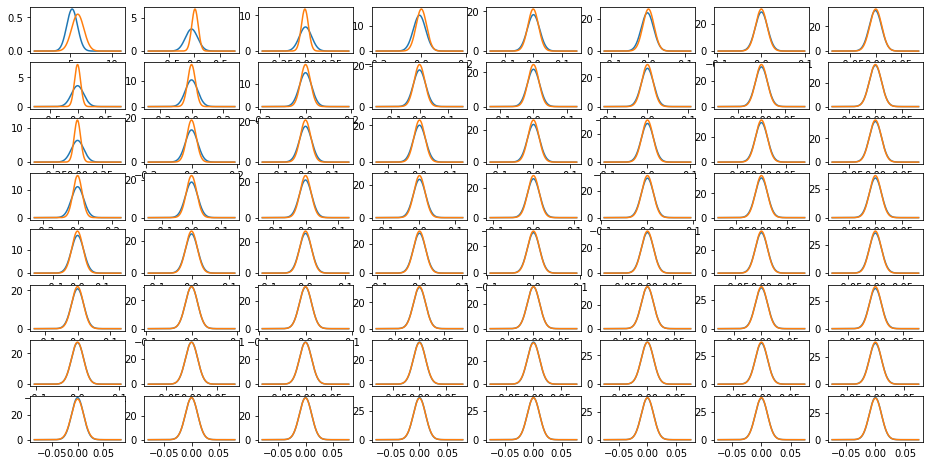

In [9]:
#marginal density plot
from scipy.stats import norm
from scipy.special import kl_div
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(16,8))
KL_distance = []
mean_distance = np.zeros(foreground.shape[1])
for i in range(foreground.shape[1]):
    fig.add_subplot(8,8,i+1)
    x_FG = np.linspace(mean_FG[i] - 7 * se_FG[i] ,mean_FG[i] + 7 * se_FG[i],500)
    x_BG = np.linspace(mean_BG[i] - 7 * se_BG[i], mean_BG[i] + 7 * se_BG[i],500)
    x = np.sort(np.array([x_FG,x_BG]),axis = None)
    y_FG = norm.pdf(x,mean_FG[i],se_FG[i])
    y_BG = norm.pdf(x,mean_BG[i],se_BG[i])
    #KL = kl_divergence(y_BG,y_FG)
    #KL_distance.append(KL)
    mean_distance[i] = abs(mean_FG[i] - mean_BG[i])
    plt.plot(x,y_FG,x,y_BG)
#     title = "Fit result for the %d feature" %(i+1)
#     plt.title(title)
plt.show()

/Users/estepark/Library/Python/3.7/lib/python/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/estepark/Library/Python/3.7/lib/python/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


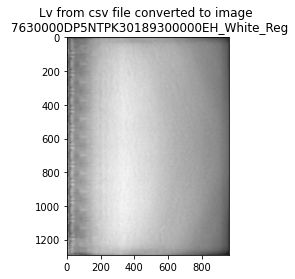

KeyboardInterrupt: 

In [12]:
from scipy.stats import multivariate_normal
import time
import pandas as pd
start = time.time()
from numpy.linalg import inv,det

#path = '/Users/estepark/Documents/week11_mon/Vermouth_DVT/20190412D DVT DNC1-A/20190412/Data/HiResMesh/White'
path = '/Users/estepark/Documents/week11_mon/Vermouth_HVT/2018-09-10 D HVT HG8A/20180910/Data/HiResMesh/White'

cov_FG_inv = inv(cov_FG)
cov_BG_inv = inv(cov_BG)
cov_FG_det = det(cov_FG)
cov_BG_det = det(cov_BG)

scores= []

for fname in glob.glob(path+'/*.CSV'):
    A=[]
    Lv_csv = pd.read_csv(fname, skiprows=[0], header=None)
    for i in range(0,1500):
        # find element's index corresponding to u'
        if ( Lv_csv[0][i] =="u'" ): 
            # save all Lv matrix values until u' index
            Lvindex = int(np.where(Lv_csv == Lv_csv[0][i])[0] ) 
            break     # as soon as matched index valid, exit & search no further
    # concatenated Lv matrix that excludes u' and v' matrix in csv file
    Lv = np.array(Lv_csv[0: Lvindex], dtype="float32" ) 


    spltName = fname.split('/')[-1][:-4] 
    #fnames.append(spltName)
    plt.figure()
    imgLv = np.array(Lv, dtype = "uint8") #cv2 for 8u and 32f images in function 'bilateralFilter'
    imgLvcopy = imgLv.copy()
        
    plt.title("Lv from csv file converted to image \n {}".format(spltName))
    plt.imshow(np.array(Lv), cmap="gray")
    plt.show()

    imgray = (imgLv-np.min(imgLv))/(np.max(imgLv) - np.min(imgLv))
    im_array = np.array(imgray)
    #im_border = np.ones(im_array.shape)
    #im_border[int(im_border.shape[0]*0.25):int(im_border.shape[0]*0.75),int(im_border.shape[1]*0.25):int(im_border.shape[1]*0.75)] = 0

    for i in range(0,len(im_array)-8, 2) :
        for j in range(0,im_array.shape[1]-8 , 2):
#             if im_border[i,j] == 0: 
#                 A.append(1)
#                 continue
            FG,BG = 0,0
            row_start,row_end = i,i+8
            col_start,col_end = j,j+8
            block = im_array[row_start:row_end,col_start:col_end]
            block_dct = dct2d(block).flatten()
            #block_dct = zig_zag_transform(block_dct)
            # foreground
    #         temp = block_dct - mean_FG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_FG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_FG_det) - 2 * np.log(prior_cheetah)
    #         FG = temp2 + temp3
            FG = multivariate_normal.pdf(block_dct,mean=mean_FG,cov=cov_FG)*prior_ch
            #print(block_dct) # NEEDS------------
            #background
    #         temp = block_dct - mean_BG
    #         temp1 = temp[:,np.newaxis]
    #         temp2 = (temp1.T.dot(cov_BG_inv)).dot(temp1)
    #         temp3 = np.log((2*np.pi)**64 * cov_BG_det) - 2 * np.log(prior_grass)
    #         BG = temp2 + temp3
            BG = multivariate_normal.pdf(block_dct,mean=mean_BG,cov=cov_BG)*prior_chNot
            #print(i,',',j,':',FG,',',BG) # NEEDS------------
            if (FG) >= (BG):
                A.append(0)
            else:
                A.append(1) 
        #print('row {} done!'.format(i)) # NEEDS------------
    A = np.array(A)
    #A_matrix = np.reshape(A,(i+1,j+1))
    A_matrix = np.reshape(A,(int((i+2)/2),int((j+2)/2)))
    print("rows")
    print(A_matrix.shape[0])
    print("cols")
    print(A_matrix.shape[1])
    print("-----")
    sumWhite = np.sum(A_matrix==0) # the number of blck pixels corresponds to CH. with the greatest CH, img will be very white
    print("number of white pxiels: " + str(sumWhite))
    
    scores.append(sumWhite)

    plt.figure()
    plt.title(serNum)
    plt.imshow(A_matrix, cmap="gray")
    plt.show()
    

end = time.time()
print(end - start)
    